Oversampling > 2x suggested for reliable results in Fresnel propagation.


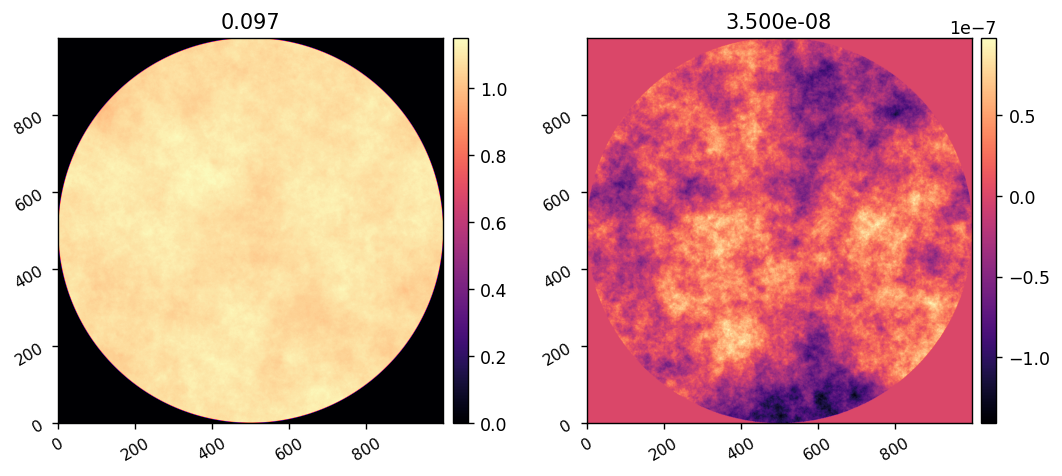

array(3.5e-08)

In [10]:
import numpy as np
import astropy.units as u
from datetime import datetime
today = int(datetime.today().strftime('%Y%m%d'))
from importlib import reload
from matplotlib.patches import Circle

from scoobpsf.math_module import xp, _scipy, ensure_np_array
from scoobpsf.imshows import imshow1, imshow2, imshow3
import scoobpsf.scoob_fraunhofer as scoob
import scoobpsf.utils as utils
import scoobpsf.dm as dm

import lina

wavelength_c = 633*u.nm
pupil_diam = 10*u.mm

reload(utils)
npix = 1000
WFE, mask = lina.utils.generate_wfe(diam=pupil_diam,
                                npix=npix, oversample=1,
                                wavelength=wavelength_c,
                                opd_index=2.75, amp_index=2.75,
                                opd_rms=35*u.nm, amp_rms=0.02,
                                remove_modes=12)

wfe_amp = xp.abs(WFE)
wfe_opd = xp.angle(WFE)*wavelength_c.to_value(u.m)/2/np.pi
rms_amp = xp.sqrt(xp.mean(xp.square(wfe_amp[mask]-1)))
rms_opd = xp.sqrt(xp.mean(xp.square(wfe_opd[mask])))
imshow2(wfe_amp, wfe_opd,  f'{rms_amp:.3f}', f'{rms_opd:.3e}')
lina.utils.rms(wfe_opd[mask])

In [6]:
utils.save_fits('example_wfe_amp.fits', wfe_amp)
utils.save_fits('example_wfe_opd.fits', wfe_opd)

Saved data to:  example_wfe_amp.fits
Saved data to:  example_wfe_opd.fits


Oversampling > 2x suggested for reliable results in Fresnel propagation.


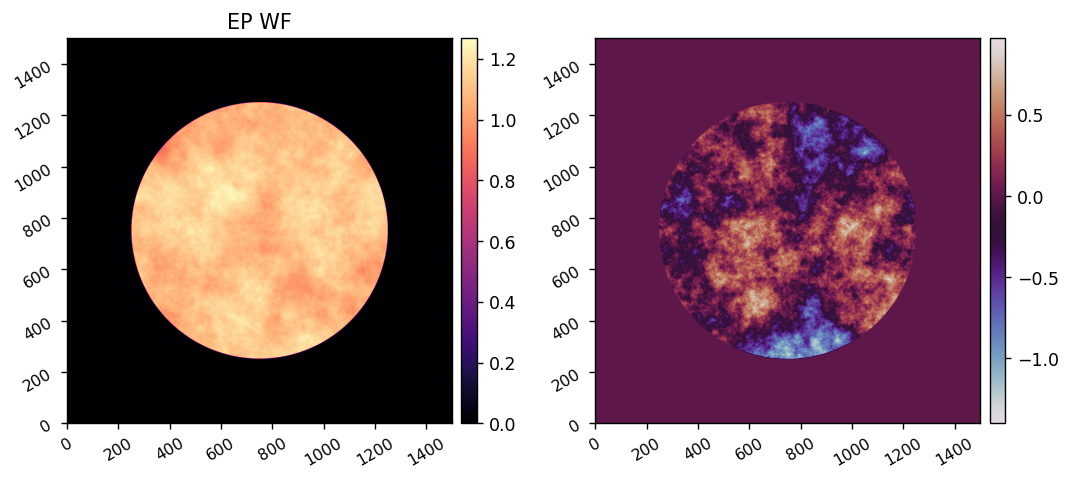

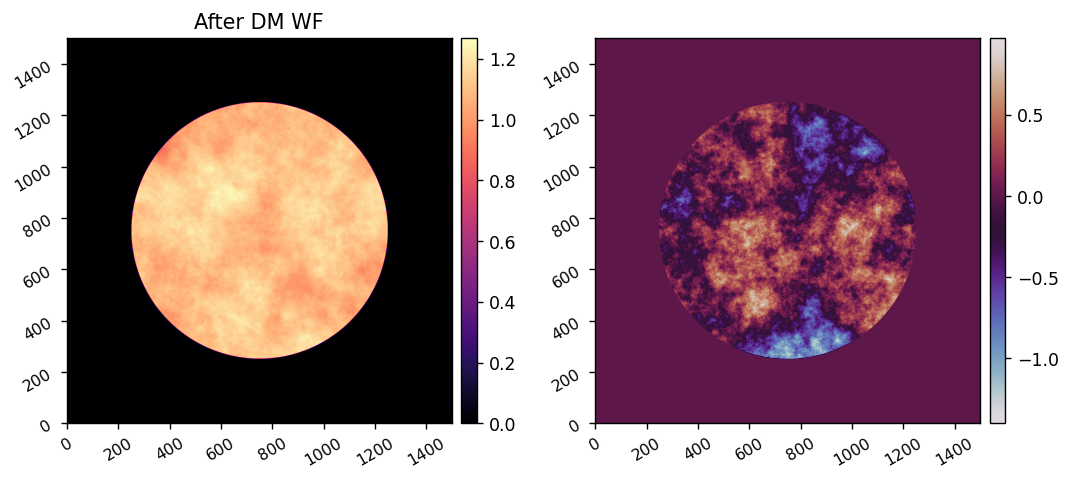

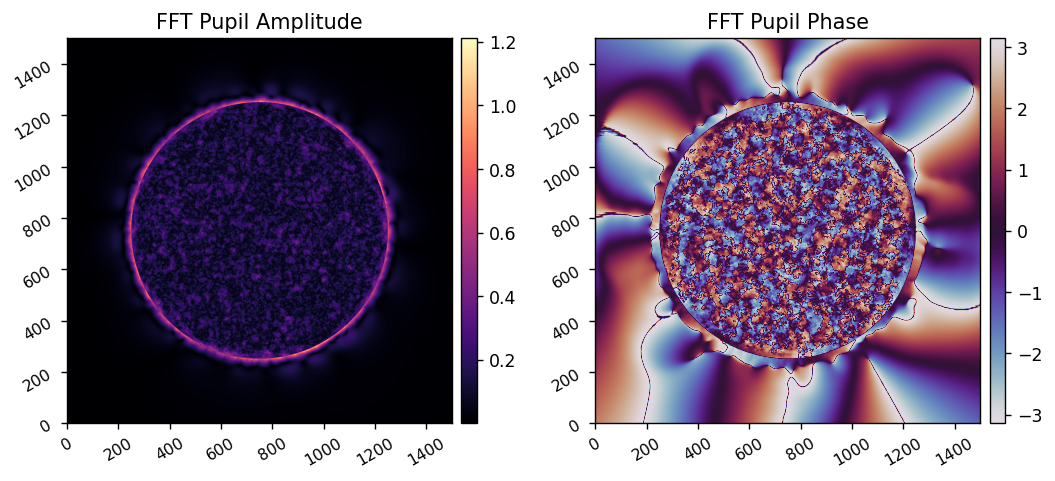

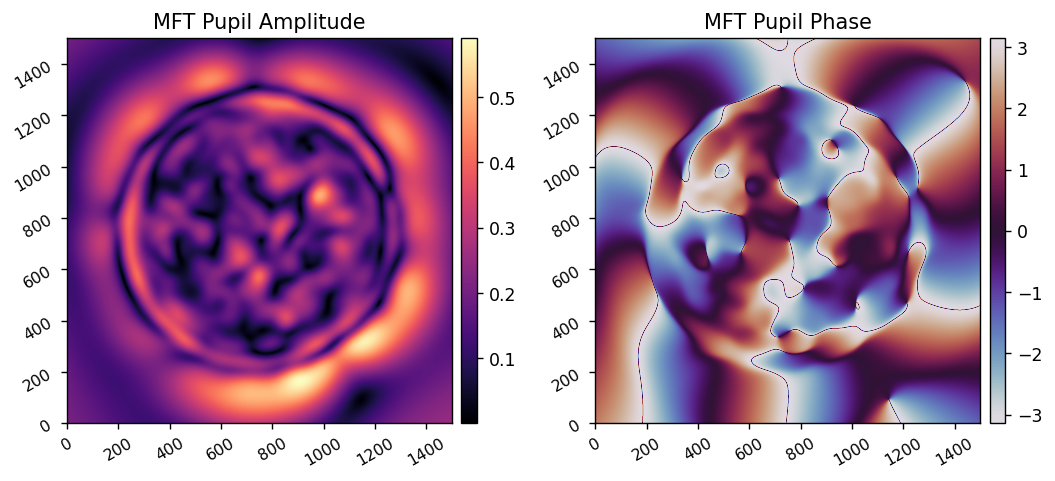

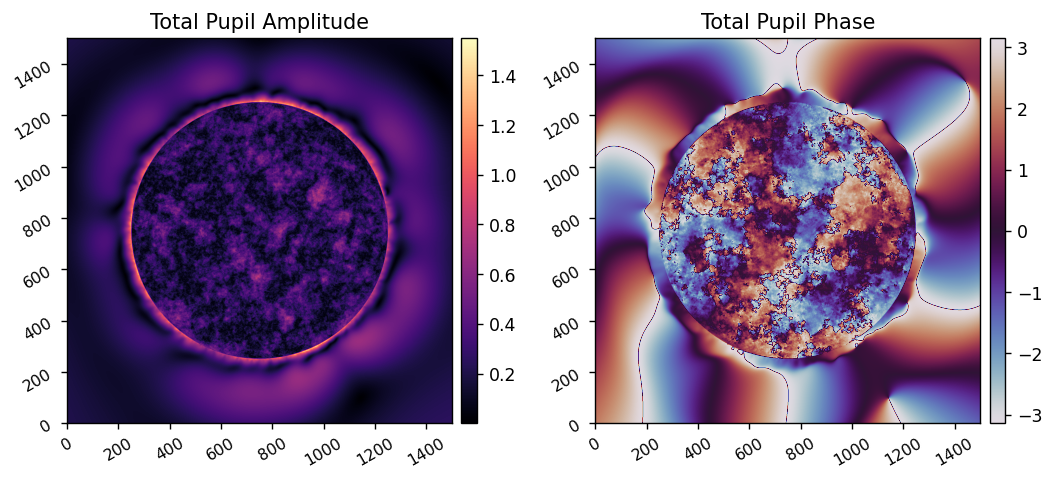

(2048, 2048)


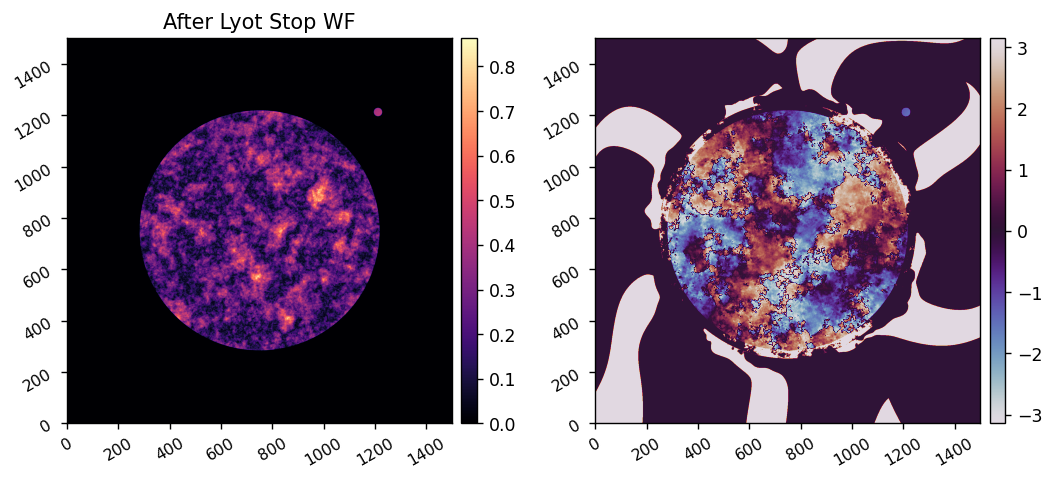

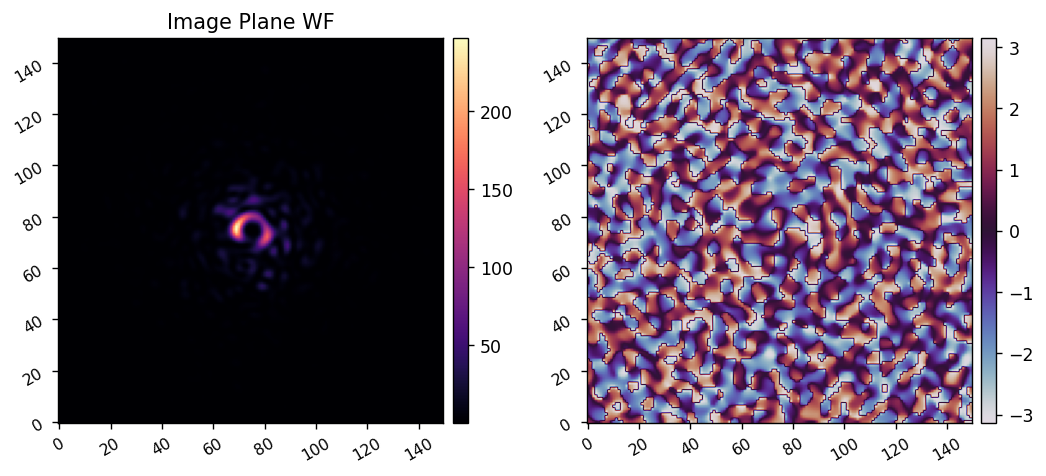

In [11]:
reload(scoob)
M = scoob.single()
M.setattr('WFE', WFE)
M.setattr('use_vortex', True)
M.use_scc()
# M.use_llowfsc()
wfs = M.calc_wfs(plot=True)

Oversampling > 2x suggested for reliable results in Fresnel propagation.


(3000, 3000)


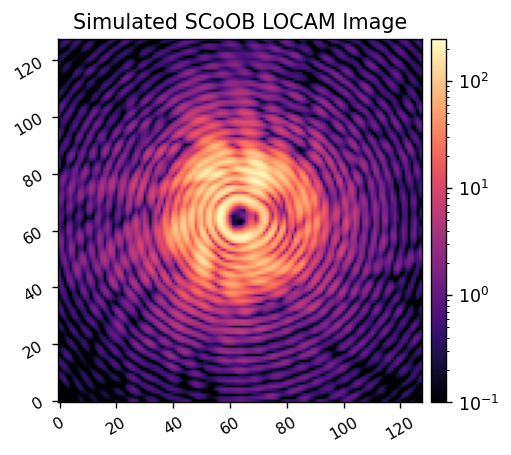

In [6]:
reload(scoob)
M = scoob.single()
M.setattr('WFE', WFE)
M.setattr('use_vortex', True)
M.setattr('llowfsc_defocus', 2.25*u.mm)
M.setattr('nlocam',128)
locam_im = M.snap_locam()
imshow1(locam_im, 'Simulated SCoOB LOCAM Image', lognorm=True, vmin=1e-1)

Oversampling > 2x suggested for reliable results in Fresnel propagation.


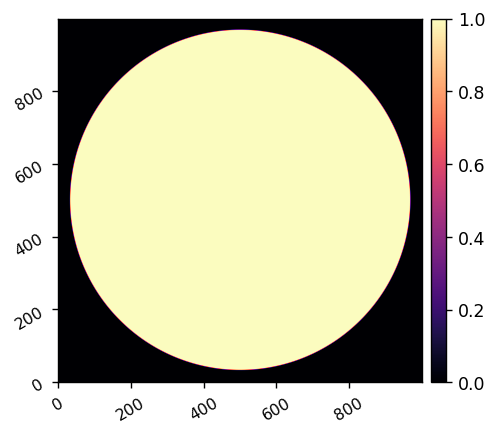

(2048, 2048)


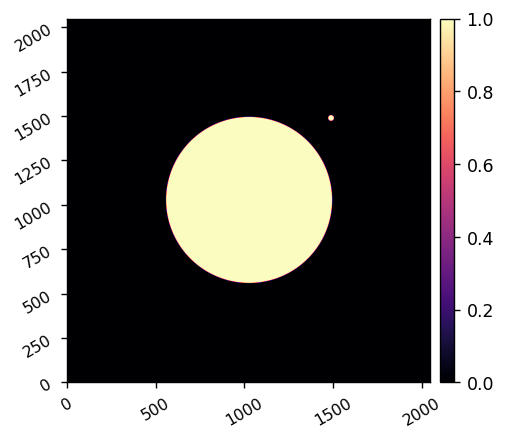

(2048, 2048)


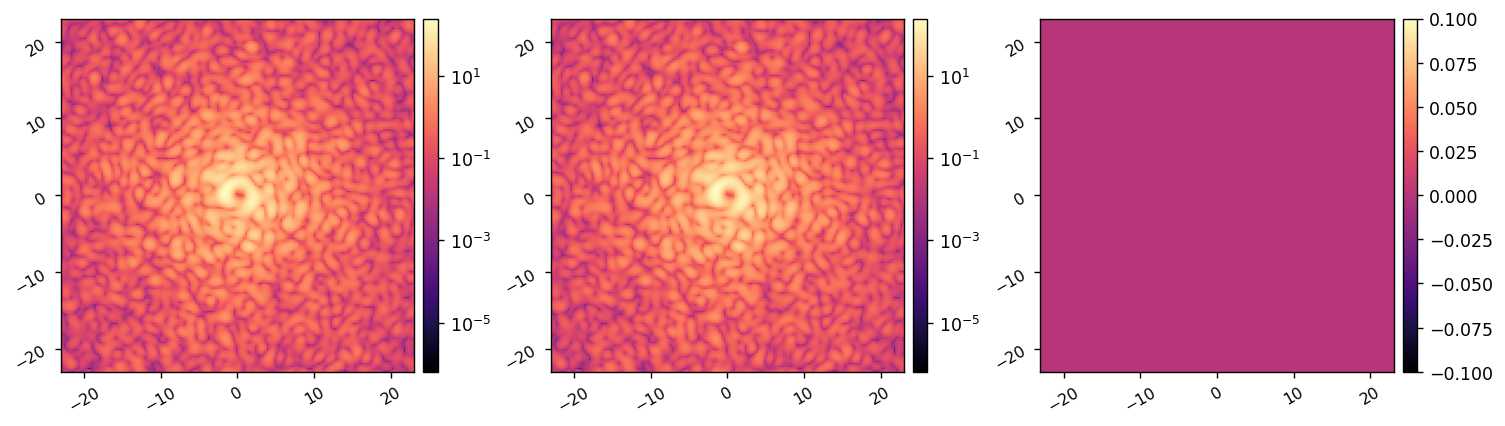

In [9]:
reload(scoob)
M = scoob.single()
M.setattr('WFE', WFE)
M.setattr('use_vortex', True)

M.use_scc(False)
imshow1(M.LYOT)
coro_im = M.snap()

M.use_scc()
imshow1(M.LYOT)
mod_coro_im = M.snap()

imshow3(coro_im, mod_coro_im, coro_im - mod_coro_im, 
        lognorm1=True, lognorm2=True,
        pxscl=M.psf_pixelscale_lamD, )